# Support Vector Machine for Regression
- Since SVM creates a hyperplane in between the data points it is actually possible to treate that hyperplane as a regression line that fits the training set for continuous data

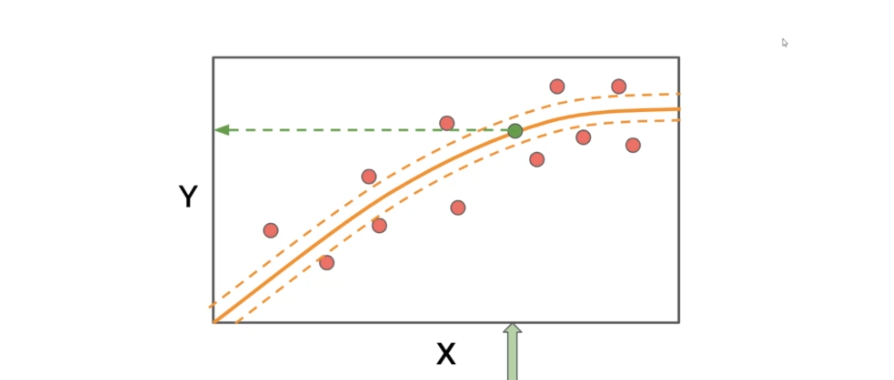

- Scikit-learns has `SVR` and `LinearSVR` for regression
- The `SVR` model allows for different kernel parameters while `LinearSVR` only supports linear kernel
- Using `LinearSVR` for linear kernel is faster than `SVR` with parameter `kernel = 'linear'` 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [2]:
df = pd.read_csv('cement_slump.csv')

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [5]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis= 1)
y = df['Compressive Strength (28-day)(Mpa)']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [8]:
svm = SVR()

In [9]:
svm.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [10]:
C = [0, 0.01, 0.1, 0.5, 1, 1.5, 2]
gamma = ['scale', 'auto', 0.01, 0.5, 1, 2]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [1,2,3,4]
epsilon = [0, 0.01, 1, 2, 3]
grid_params = {'kernel':kernels, 'epsilon':epsilon, 'gamma':gamma, 'degree':degree, 'C':C}

In [11]:
grid = GridSearchCV(estimator= svm, param_grid=grid_params, cv =5, verbose = 1)

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
grid.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 3360 candidates, totalling 16800 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0, 0.01, 0.1, 0.5, 1, 1.5, 2],
                         'degree': [1, 2, 3, 4], 'epsilon': [0, 0.01, 1, 2, 3],
                         'gamma': ['scale', 'auto', 0.01, 0.5, 1, 2],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [14]:
grid.best_params_

{'C': 1, 'degree': 1, 'epsilon': 3, 'gamma': 2, 'kernel': 'poly'}

### What's going on? Degree 1 but poly kernel!! Why not linear kernel?
- The poly kernel implementation of sklearn is slightly different from that we generally interprete
- In the documentation sklearn mentions the poly kernel as: $K(x,y) = (\gamma \langle x,y \rangle + \beta_0) ^ d$
- Polynomial with degree one is basically a linear, but the GridSearch finds it optimal to have some effect of gamma in the model hence prefers poly kernel with degree 1 rather than linear kernel which has no gamma parameter

In [15]:
y_test_pred = grid.predict(scaled_X_test)

In [16]:
mean_squared_error(y_test, y_test_pred)

np.float64(10.75873252918949)

In [17]:
root_mean_squared_error(y_test, y_test_pred)

np.float64(3.2800506900335384)